In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# This imports the cat vs non-cat image dataset from the course
from cats import *

# This imports the main code to perform forward and backpropagations for a feed-forward neural network
# The functions/modifications to the code that I've implemented are in this file
from aNN import *



/Users/Armantas/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# The artificial synapse device conductance (Gij) must be mapped to algorithm weights (wij)
# Choose a positive w_range below, right now w_range = [0, 0.05]
# (the negative range is generated automatically)

# Some possible examples:
# w_range = [0.1, 0.2]
# w_range = [0, 0.01]

w_range = np.array([0, 0.05]).reshape(1,2)
assert(w_range.shape == (1,2)) # Check to avoid shape = (2,)



In [3]:
# The artifical synapse device weight updates (dGij) are inherently noisy
# this might affect algorithm accuracy

# Choose noise intensity
noise = 2 #times the weight update

# Some possible examples:
# noise = 0 means that the device is noise-free and every weight update is as expected
# noise = 10 means that every single weight update has a random error which is 10x the size of the update itself

# The error value is randomly drawn from a uniform distribution [-1,1],
# then scaled by the noise factor and added to the weight update



In [4]:
# This loads the cat image data

# Load data
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Some definitions
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

# Reshape the training and test examples to column vectors
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.



Cost after iteration 0: 0.693236
Training ccuracy: 62.20095693779905
Test accuracy: 44.0
Cost after iteration 100: 0.642741
Training ccuracy: 65.55023923444976
Test accuracy: 34.0
Cost after iteration 200: 0.627801
Training ccuracy: 65.55023923444976
Test accuracy: 34.0
Cost after iteration 300: 0.614464
Training ccuracy: 65.55023923444976
Test accuracy: 34.0
Cost after iteration 400: 0.601527
Training ccuracy: 65.55023923444976
Test accuracy: 34.0
Cost after iteration 500: 0.589534
Training ccuracy: 65.55023923444976
Test accuracy: 34.0
Cost after iteration 600: 0.579440
Training ccuracy: 66.02870813397129
Test accuracy: 34.0
Cost after iteration 700: 0.569239
Training ccuracy: 66.50717703349282
Test accuracy: 36.0
Cost after iteration 800: 0.560100
Training ccuracy: 66.98564593301435
Test accuracy: 36.0
Cost after iteration 900: 0.550791
Training ccuracy: 67.46411483253588
Test accuracy: 36.0
Cost after iteration 1000: 0.541717
Training ccuracy: 68.42105263157895
Test accuracy: 34.0


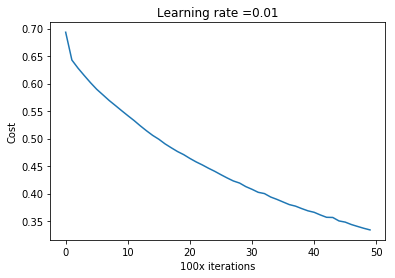

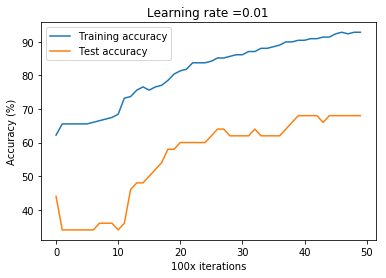

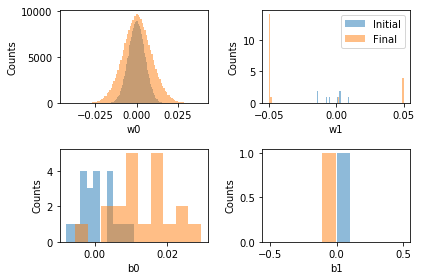

In [5]:
# Train L-layer model

# This code trains an L-layer feed-forward neural network model
# For every 100th iteration the model outputs:
# 1) Cost
# 2) Training acurracy
# 3) Test accuracy

# When training is completed the model will output:
# 4) Initial and final weight distributions, i.e. before and after training, which is
# useful to visualize the effect of limited weight range and noise



# Choose layer dimensions
layers_dims = [num_px*num_px * 3, 20, 1]



# Below are the currently available options to impose weight limitations during forward and backprop:

# If w_limit = [True,...], weights will be limited to the range set by w_range 
# If w_limit = [False,...], weights are non-limited


# If w_limit = [...,"Xavier"], weights are initialized according to Xavier initialization
# If w_limit = [..., "Normal"], weights are initialized as a Gaussian truncated (limited) by w_range
# If w_limit = [..., "Uniform"], weights are uniformly initialized over the range set by w_range


# Use w_centered = True, to initialize weights uniformly, e.g. from [-1,1] if w_limit = [0,1]
# Use w_centered = False, to itialize weights non-uniformly, e.g. [-1,-0.1] to [0.1,1] if w_limit = [0.1,1]



parameters, caches, w_initial, w_final, accuracy_train, accuracy_test, costs = L_layer_model(
        train_x, train_y, test_x, test_y, layers_dims,
        learning_rate = 0.01, num_iterations = 5000, print_cost = True,
        noise = noise, w_limit = [True, "Normal"], w_centered = True, w_range = w_range)



#